# Plain N-BEATS model approach using a customized loss

* This approach uses the plain N-BEATS model, using 12 blocks

In [1]:
import torch
import torch.nn as nn
import numpy as np
from models.nbeats_custom import NBeats
from data import OhioData
import torch.optim as optim
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from tqdm import tqdm

# Parameters 

* I just tried out a few parameters
* One can optimize them by using hyper parameter search metrics (baysian parameter optimization)

In [2]:
epochs = 250
n_batches = 1024
input_dim = 24
n_features = 11
n_blocks = 12
lstm_hidden = 10
bidirectional = False
lstm_layer = 1
output_dim = 12
amount_fc = 3
hidden_dim = 64
early_stopping_counter = 10

lr = 1e-5

# Loading data

In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

val_data = OhioData(mode="validation", h=12)

train_data = OhioData(h=12)



# Utils

* the input is reshaped to: (sequence length, batch_size, features)
* data[0, 0, :] describes the data of a single time step

In [4]:
def prepare_data(batch):
    batch = batch.reshape(batch.shape[0], 24, 11).permute(1, 0, 2)
    return batch
    

# Training loop

In [5]:
train_loader = DataLoader(train_data, batch_size=n_batches, shuffle=True, num_workers=0)
val_loader = DataLoader(val_data, batch_size=n_batches, shuffle=False, num_workers=0)

model = NBeats(n_blocks=n_blocks, input_dim=input_dim, parameter_dim=n_features, output_dim=output_dim, amount_fc=amount_fc, hidden_dim=hidden_dim, lstm_hidden=lstm_hidden, lstm_layer=lstm_layer, lstm_bidirectional=bidirectional).to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
scheduler2 = optim.lr_scheduler.ExponentialLR(optimizer, gamma=.99)

* Plots the prediction and the label of a single example

In [6]:
def plot_example(y, y_pred, inp, scale_factor=400):
    with torch.no_grad():
        idx_list = list(range(len(inp) + len(y)))
        y_pred *= scale_factor
        inp = np.append(inp, y) * scale_factor
        fig, ax = plt.subplots(1)
        ax.plot(idx_list, inp, label="Input + Label")
        ax.plot(idx_list[-output_dim:], y_pred, label="Predicted Label")
        ax.legend()
        ax.set_title("Predicted vs actual future")
    return fig

## Approach
1. Vizualize prediction of the current model
2. Run model on validation set
3. Train on train data
   
## Notes
* Early stopping is used 
* two separate lr schedulers are used

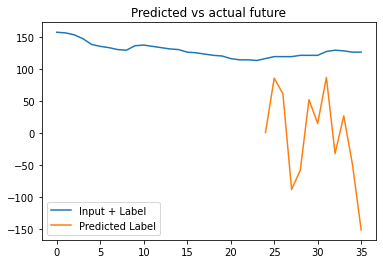

[Training:0] Total Loss: 15.20 Loss: 12.20: 100%|██████████| 93/93 [00:23<00:00,  3.88it/s]


tensor([ 0.1210,  0.2993,  0.2508, -0.0255,  0.0413,  0.2381,  0.1494,  0.3219,
         0.0558,  0.2047,  0.0527, -0.1691], device='cuda:0',
       grad_fn=<SelectBackward0>) tensor([0.3125, 0.3050, 0.3025, 0.3150, 0.3125, 0.3025, 0.2950, 0.2925, 0.2900,
        0.2875, 0.2975, 0.2975], device='cuda:0')


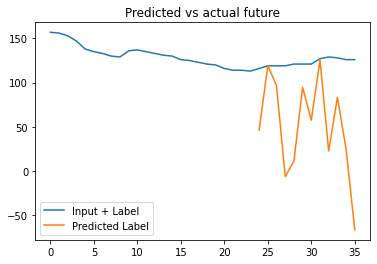

[Training:1] Total Loss: 9.00 Loss: 6.65: 100%|██████████| 93/93 [00:24<00:00,  3.85it/s] 


tensor([0.2296, 0.3800, 0.3604, 0.1519, 0.1745, 0.3543, 0.2992, 0.4197, 0.1903,
        0.2969, 0.2504, 0.0575], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3550, 0.3450, 0.3375, 0.3300, 0.3200, 0.3075, 0.3025, 0.3000, 0.2975,
        0.2950, 0.2925, 0.2900], device='cuda:0')


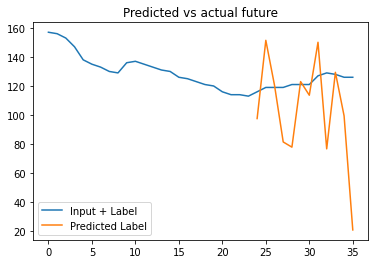

[Training:2] Total Loss: 5.22 Loss: 3.97: 100%|██████████| 93/93 [00:24<00:00,  3.81it/s]


tensor([0.3374, 0.4278, 0.3993, 0.3539, 0.3049, 0.4320, 0.4112, 0.4493, 0.3278,
        0.3702, 0.4071, 0.2383], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4675, 0.4700, 0.4725, 0.4725, 0.4725, 0.4775, 0.4800, 0.4825, 0.4850,
        0.4875, 0.4950, 0.4950], device='cuda:0')


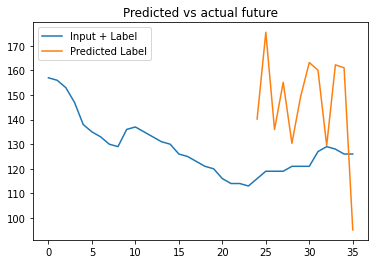

[Training:3] Total Loss: 3.44 Loss: 2.90: 100%|██████████| 93/93 [00:24<00:00,  3.82it/s]


tensor([0.3921, 0.4454, 0.3882, 0.5032, 0.4140, 0.4109, 0.4671, 0.4410, 0.4088,
        0.4517, 0.4553, 0.3598], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5325, 0.5375, 0.5425, 0.5525, 0.5575, 0.5500, 0.5350, 0.5200, 0.5025,
        0.4800, 0.4600, 0.4450], device='cuda:0')


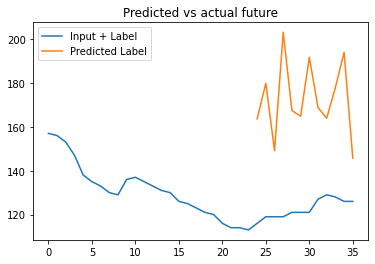

[Training:4] Total Loss: 2.82 Loss: 2.96: 100%|██████████| 93/93 [00:24<00:00,  3.84it/s]


tensor([0.4236, 0.4397, 0.4106, 0.5390, 0.4649, 0.4574, 0.5024, 0.4611, 0.4575,
        0.4740, 0.4906, 0.4329], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2675, 0.2625, 0.2550, 0.2500, 0.2450, 0.2325, 0.2250, 0.2200, 0.2175,
        0.2125, 0.2100, 0.2075], device='cuda:0')


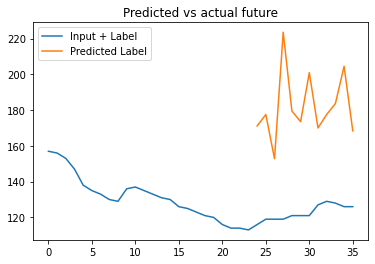

[Training:5] Total Loss: 2.59 Loss: 2.57: 100%|██████████| 93/93 [00:24<00:00,  3.86it/s]


tensor([0.4224, 0.4252, 0.4159, 0.5511, 0.4649, 0.4596, 0.5025, 0.4585, 0.4688,
        0.4665, 0.4942, 0.4494], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1975, 0.2000, 0.2000, 0.1975, 0.2025, 0.2025, 0.1875, 0.1800, 0.1825,
        0.1825, 0.1825, 0.1900], device='cuda:0')


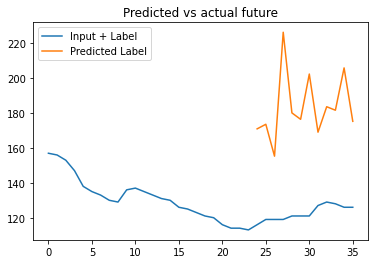

[Training:6] Total Loss: 2.45 Loss: 2.53: 100%|██████████| 93/93 [00:24<00:00,  3.82it/s]


tensor([0.3535, 0.3699, 0.3101, 0.4858, 0.3454, 0.3948, 0.4834, 0.3973, 0.4074,
        0.4075, 0.4114, 0.4077], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3800, 0.3750, 0.3700, 0.3650, 0.3600, 0.3525, 0.3325, 0.3175, 0.3125,
        0.3100, 0.3100, 0.3075], device='cuda:0')


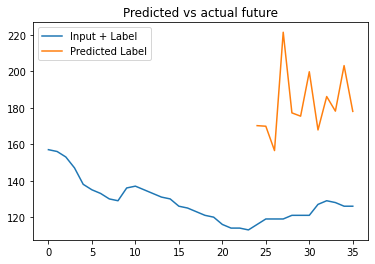

[Training:7] Total Loss: 2.34 Loss: 2.27: 100%|██████████| 93/93 [00:24<00:00,  3.82it/s]

tensor([0.4345, 0.4183, 0.4212, 0.5149, 0.4448, 0.4564, 0.4855, 0.4582, 0.4729,
        0.4415, 0.4807, 0.4449], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5125, 0.5150, 0.5225, 0.5275, 0.5350, 0.5500, 0.5625, 0.5950, 0.6350,
        0.6150, 0.6125, 0.6100], device='cuda:0')


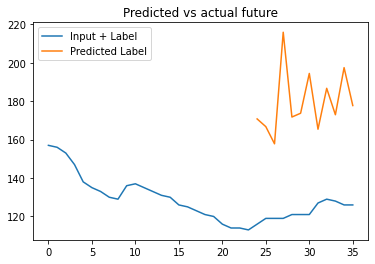

[Training:8] Total Loss: 2.24 Loss: 2.14: 100%|██████████| 93/93 [00:25<00:00,  3.68it/s]


tensor([0.4384, 0.4170, 0.4115, 0.5004, 0.4347, 0.4484, 0.4793, 0.4526, 0.4652,
        0.4381, 0.4761, 0.4311], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4200, 0.4100, 0.4025, 0.3975, 0.3900, 0.4050, 0.4350, 0.4175, 0.4025,
        0.3975, 0.3950, 0.3900], device='cuda:0')


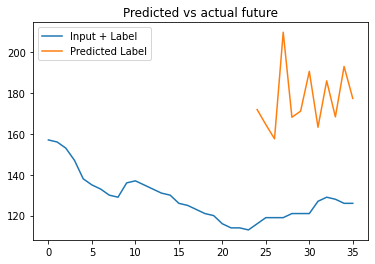

[Training:9] Total Loss: 2.16 Loss: 2.20: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.4689, 0.4678, 0.4190, 0.4805, 0.4647, 0.4493, 0.4663, 0.4629, 0.4523,
        0.4387, 0.4830, 0.4396], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.7075, 0.6925, 0.6750, 0.6575, 0.6400, 0.6325, 0.6125, 0.5925, 0.5850,
        0.5775, 0.5725, 0.5725], device='cuda:0')


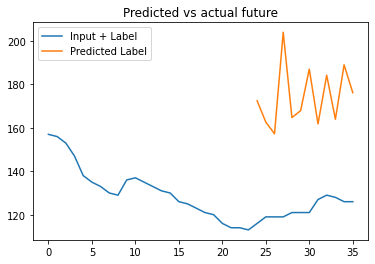

[Training:10] Total Loss: 2.09 Loss: 1.93: 100%|██████████| 93/93 [00:24<00:00,  3.82it/s]


tensor([0.3861, 0.3418, 0.3726, 0.4751, 0.3942, 0.4157, 0.4335, 0.4102, 0.4512,
        0.4015, 0.4071, 0.4244], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1950, 0.1950, 0.1950, 0.1975, 0.1975, 0.1975, 0.2000, 0.2000, 0.2050,
        0.2125, 0.2125, 0.2175], device='cuda:0')


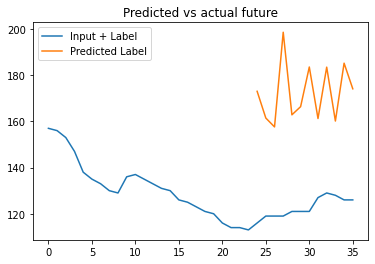

[Training:11] Total Loss: 2.02 Loss: 2.18: 100%|██████████| 93/93 [00:24<00:00,  3.74it/s]


tensor([0.4162, 0.5344, 0.4710, 0.4542, 0.5018, 0.4555, 0.5035, 0.4977, 0.4537,
        0.4891, 0.4843, 0.3969], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6075, 0.6275, 0.6400, 0.6475, 0.6575, 0.6675, 0.6775, 0.6875, 0.6975,
        0.7175, 0.7300, 0.7375], device='cuda:0')


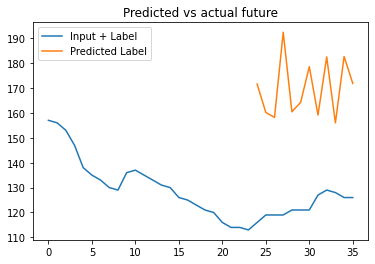

[Training:12] Total Loss: 1.95 Loss: 2.04: 100%|██████████| 93/93 [00:24<00:00,  3.84it/s]


tensor([0.4541, 0.4507, 0.4377, 0.4932, 0.4205, 0.4386, 0.4459, 0.4569, 0.4731,
        0.4094, 0.4614, 0.4579], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5075, 0.5000, 0.4975, 0.4925, 0.4900, 0.4875, 0.4825, 0.4750, 0.4550,
        0.4325, 0.4200, 0.4175], device='cuda:0')


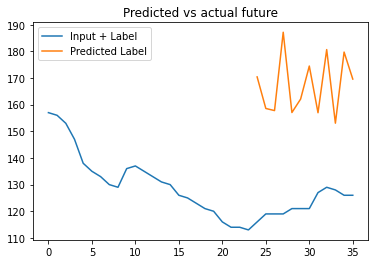

[Training:13] Total Loss: 1.89 Loss: 1.65: 100%|██████████| 93/93 [00:24<00:00,  3.87it/s]


tensor([0.3760, 0.3553, 0.3424, 0.4070, 0.3569, 0.4207, 0.4319, 0.3668, 0.4286,
        0.3581, 0.3855, 0.3862], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2200, 0.2300, 0.1950, 0.1800, 0.2025, 0.2225, 0.2375, 0.2500, 0.2450,
        0.2350, 0.2175, 0.1950], device='cuda:0')


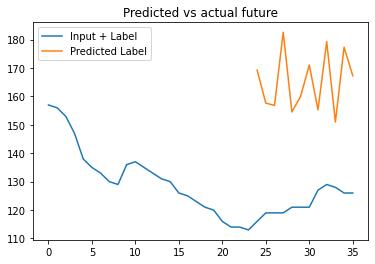

[Training:14] Total Loss: 1.84 Loss: 1.77: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.3642, 0.3259, 0.3401, 0.4137, 0.3578, 0.3836, 0.3962, 0.3716, 0.4274,
        0.3633, 0.3744, 0.3886], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1600, 0.1575, 0.1575, 0.1575, 0.1575, 0.1575, 0.1600, 0.1625, 0.1625,
        0.1625, 0.1625, 0.1650], device='cuda:0')


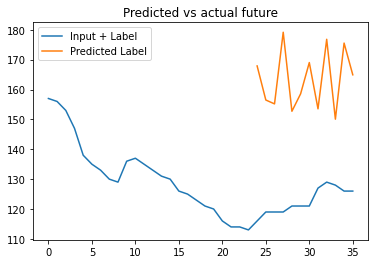

[Training:15] Total Loss: 1.79 Loss: 1.66: 100%|██████████| 93/93 [00:25<00:00,  3.67it/s]


tensor([0.4352, 0.5335, 0.4826, 0.4882, 0.4968, 0.4625, 0.5137, 0.5085, 0.4675,
        0.4847, 0.4887, 0.4028], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5925, 0.5700, 0.5425, 0.5225, 0.5050, 0.4925, 0.4850, 0.4750, 0.4850,
        0.4875, 0.4875, 0.4750], device='cuda:0')


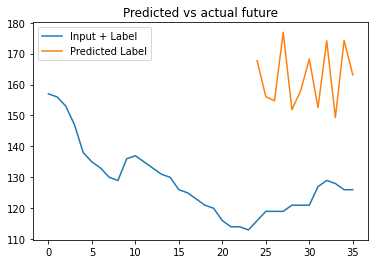

[Training:16] Total Loss: 1.75 Loss: 1.82: 100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


tensor([0.4096, 0.3698, 0.3684, 0.4211, 0.3790, 0.4054, 0.4220, 0.3732, 0.4152,
        0.3813, 0.4159, 0.4003], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3700, 0.3725, 0.3775, 0.3725, 0.3650, 0.3525, 0.3600, 0.3800, 0.3825,
        0.3775, 0.3725, 0.3625], device='cuda:0')


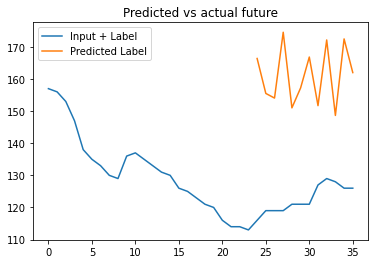

[Training:17] Total Loss: 1.71 Loss: 1.72: 100%|██████████| 93/93 [00:24<00:00,  3.85it/s]


tensor([0.4741, 0.4445, 0.4211, 0.4669, 0.4328, 0.4315, 0.4614, 0.4330, 0.4399,
        0.4165, 0.4577, 0.4413], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5650, 0.5750, 0.5825, 0.5950, 0.6125, 0.5575, 0.5500, 0.5500, 0.5625,
        0.5875, 0.6300, 0.6825], device='cuda:0')


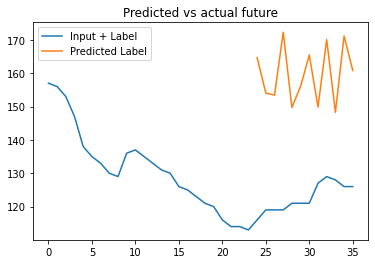

[Training:18] Total Loss: 1.68 Loss: 1.72: 100%|██████████| 93/93 [00:23<00:00,  3.88it/s]


tensor([0.4018, 0.3755, 0.3799, 0.4172, 0.3911, 0.4013, 0.4081, 0.4022, 0.4251,
        0.3828, 0.3842, 0.3995], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2350, 0.2200, 0.2325, 0.2475, 0.2725, 0.2825, 0.2875, 0.2875, 0.3125,
        0.3350, 0.3300, 0.3075], device='cuda:0')


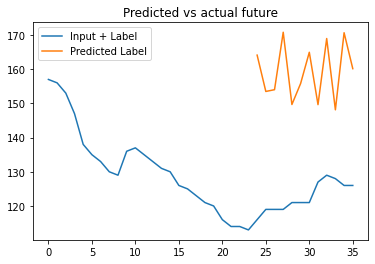

[Training:19] Total Loss: 1.64 Loss: 1.56: 100%|██████████| 93/93 [00:23<00:00,  3.92it/s]


tensor([0.4180, 0.3821, 0.3771, 0.4132, 0.3883, 0.4007, 0.4253, 0.3793, 0.4108,
        0.3775, 0.4328, 0.4050], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4075, 0.4125, 0.4125, 0.4100, 0.4075, 0.4075, 0.4050, 0.4025, 0.4025,
        0.4000, 0.4000, 0.4075], device='cuda:0')


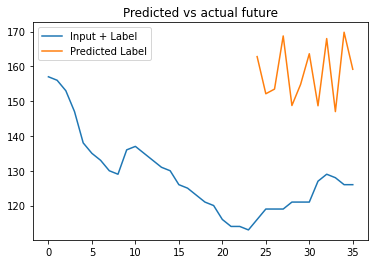

[Training:20] Total Loss: 1.61 Loss: 1.56: 100%|██████████| 93/93 [00:23<00:00,  3.90it/s]


tensor([0.5210, 0.5189, 0.4954, 0.4897, 0.4930, 0.4712, 0.5046, 0.5078, 0.4666,
        0.4606, 0.4513, 0.4712], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.8250, 0.8150, 0.8050, 0.7950, 0.7775, 0.7525, 0.7350, 0.7200, 0.7175,
        0.7225, 0.7325, 0.7325], device='cuda:0')


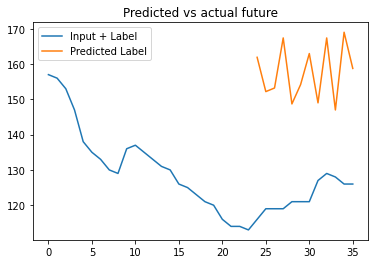

[Training:21] Total Loss: 1.59 Loss: 1.61: 100%|██████████| 93/93 [00:23<00:00,  4.04it/s]


tensor([0.4231, 0.4209, 0.4060, 0.4263, 0.3984, 0.4075, 0.4244, 0.4121, 0.4207,
        0.3872, 0.4409, 0.4152], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5475, 0.5500, 0.5475, 0.5325, 0.5100, 0.4950, 0.4825, 0.4575, 0.4225,
        0.3950, 0.3500, 0.3300], device='cuda:0')


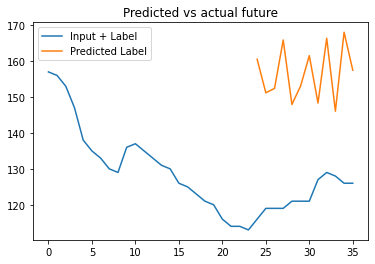

[Training:22] Total Loss: 1.56 Loss: 1.56: 100%|██████████| 93/93 [00:22<00:00,  4.10it/s]


tensor([0.3593, 0.3351, 0.3523, 0.3689, 0.3596, 0.3714, 0.3788, 0.3762, 0.4130,
        0.3754, 0.3609, 0.3788], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2850, 0.2700, 0.2550, 0.2450, 0.2450, 0.2475, 0.2525, 0.2650, 0.2750,
        0.2925, 0.3100, 0.3325], device='cuda:0')


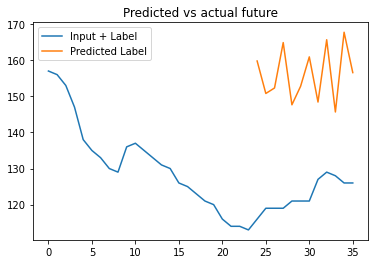

[Training:23] Total Loss: 1.54 Loss: 1.49: 100%|██████████| 93/93 [00:22<00:00,  4.05it/s]


tensor([0.3801, 0.3435, 0.3420, 0.3661, 0.3472, 0.3628, 0.3765, 0.3310, 0.3781,
        0.3497, 0.3878, 0.3613], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2375, 0.2275, 0.2200, 0.2175, 0.2150, 0.2125, 0.2100, 0.2125, 0.2150,
        0.2150, 0.2150, 0.2175], device='cuda:0')


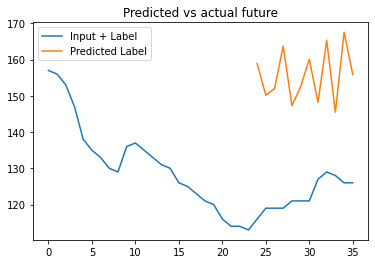

[Training:24] Total Loss: 1.52 Loss: 1.51: 100%|██████████| 93/93 [00:23<00:00,  4.03it/s]


tensor([0.3380, 0.3206, 0.3279, 0.3632, 0.3293, 0.3503, 0.3536, 0.3574, 0.3929,
        0.3394, 0.3431, 0.3471], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2225, 0.2200, 0.2175, 0.2150, 0.2150, 0.2125, 0.2100, 0.2050, 0.2025,
        0.2025, 0.2050, 0.2050], device='cuda:0')


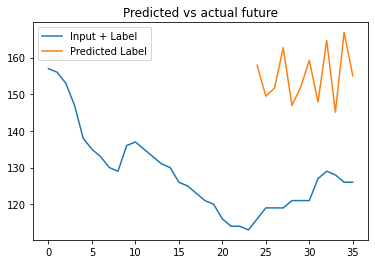

[Training:25] Total Loss: 1.50 Loss: 1.43: 100%|██████████| 93/93 [00:23<00:00,  4.02it/s]


tensor([0.4300, 0.4175, 0.4132, 0.4292, 0.4132, 0.4124, 0.4199, 0.4118, 0.4254,
        0.3861, 0.4295, 0.4171], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3375, 0.3325, 0.3250, 0.3000, 0.2900, 0.2875, 0.2875, 0.3000, 0.2850,
        0.2700, 0.2700, 0.2675], device='cuda:0')


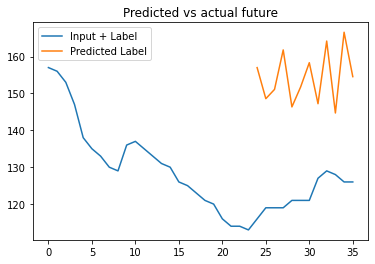

[Training:26] Total Loss: 1.48 Loss: 1.33: 100%|██████████| 93/93 [00:22<00:00,  4.11it/s]


tensor([0.3760, 0.3626, 0.3640, 0.3920, 0.3529, 0.3621, 0.3818, 0.3679, 0.4001,
        0.3651, 0.3831, 0.3739], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3250, 0.3200, 0.3150, 0.3125, 0.3075, 0.3050, 0.3000, 0.2950, 0.2900,
        0.2875, 0.2825, 0.2800], device='cuda:0')


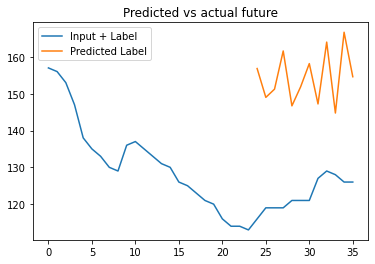

[Training:27] Total Loss: 1.46 Loss: 1.44: 100%|██████████| 93/93 [00:22<00:00,  4.07it/s]


tensor([0.3552, 0.3443, 0.3442, 0.3725, 0.3468, 0.3567, 0.3651, 0.3798, 0.3996,
        0.3512, 0.3534, 0.3653], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2850, 0.2850, 0.2825, 0.2775, 0.2725, 0.2700, 0.2675, 0.2650, 0.2600,
        0.2550, 0.2500, 0.2425], device='cuda:0')


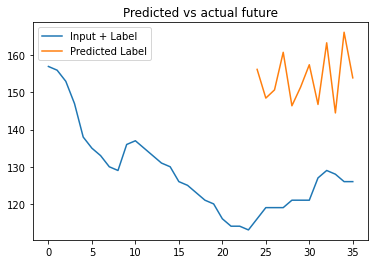

[Training:28] Total Loss: 1.45 Loss: 1.39: 100%|██████████| 93/93 [00:22<00:00,  4.09it/s]


tensor([0.3681, 0.3296, 0.3624, 0.3699, 0.3399, 0.3635, 0.3547, 0.3343, 0.3834,
        0.3395, 0.4011, 0.3680], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2150, 0.2150, 0.2200, 0.2300, 0.2350, 0.2425, 0.2700, 0.3000, 0.3225,
        0.3375, 0.3475, 0.3650], device='cuda:0')


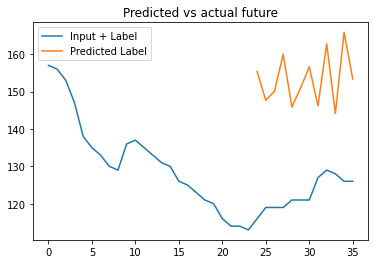

[Training:29] Total Loss: 1.43 Loss: 1.29: 100%|██████████| 93/93 [00:23<00:00,  4.04it/s]


tensor([0.4807, 0.4951, 0.4694, 0.4686, 0.4606, 0.4507, 0.4794, 0.4740, 0.4496,
        0.4613, 0.4297, 0.4389], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.7450, 0.7375, 0.7425, 0.7275, 0.7075, 0.7025, 0.7100, 0.7050, 0.6975,
        0.6850, 0.6725, 0.6625], device='cuda:0')


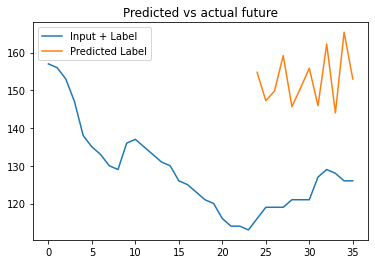

[Training:30] Total Loss: 1.42 Loss: 1.35: 100%|██████████| 93/93 [00:22<00:00,  4.05it/s]


tensor([0.3281, 0.3119, 0.3173, 0.3482, 0.3310, 0.3420, 0.3488, 0.3556, 0.3783,
        0.3373, 0.3415, 0.3452], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2175, 0.2175, 0.2175, 0.2175, 0.2175, 0.2175, 0.2175, 0.2150, 0.2125,
        0.2150, 0.2150, 0.2150], device='cuda:0')


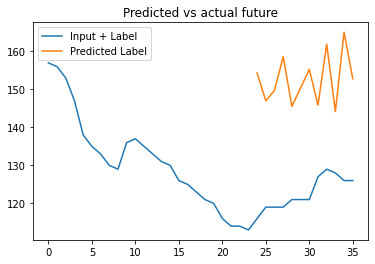

[Training:31] Total Loss: 1.41 Loss: 1.49: 100%|██████████| 93/93 [00:23<00:00,  4.04it/s]


tensor([0.3873, 0.3711, 0.3492, 0.3562, 0.3346, 0.3513, 0.3901, 0.3455, 0.3594,
        0.3701, 0.3612, 0.3481], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2825, 0.2825, 0.2725, 0.2725, 0.2700, 0.2700, 0.2750, 0.2950, 0.3125,
        0.3225, 0.3350, 0.3475], device='cuda:0')


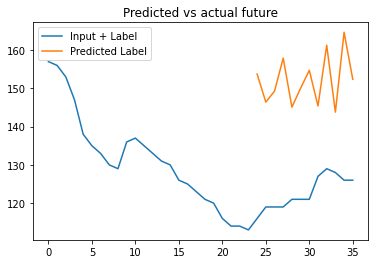

[Training:32] Total Loss: 1.39 Loss: 1.40: 100%|██████████| 93/93 [00:22<00:00,  4.08it/s]


tensor([0.4433, 0.4532, 0.4532, 0.4387, 0.4392, 0.4227, 0.4335, 0.4650, 0.4405,
        0.4334, 0.4279, 0.4269], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5025, 0.5025, 0.5050, 0.5700, 0.6500, 0.6700, 0.6825, 0.6650, 0.6625,
        0.6825, 0.6725, 0.6425], device='cuda:0')


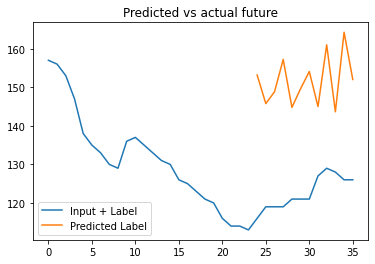

[Training:33] Total Loss: 1.38 Loss: 1.40: 100%|██████████| 93/93 [00:22<00:00,  4.05it/s]


tensor([0.3333, 0.3109, 0.3181, 0.3437, 0.3189, 0.3435, 0.3548, 0.3329, 0.3659,
        0.3426, 0.3599, 0.3373], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2125, 0.2050, 0.2000, 0.2000, 0.2125, 0.2125, 0.2050, 0.1925, 0.1850,
        0.1775, 0.1800, 0.1850], device='cuda:0')


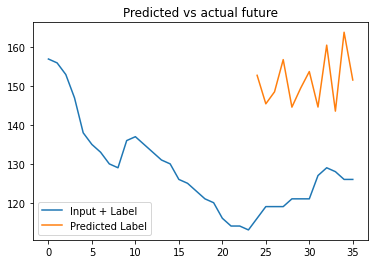

[Training:34] Total Loss: 1.37 Loss: 1.44: 100%|██████████| 93/93 [00:23<00:00,  4.02it/s]


tensor([0.2935, 0.2738, 0.2899, 0.3218, 0.2868, 0.3115, 0.3193, 0.3001, 0.3613,
        0.3043, 0.3257, 0.3056], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2525, 0.2525, 0.2575, 0.2625, 0.2650, 0.2600, 0.2550, 0.2575, 0.2525,
        0.2525, 0.2550, 0.2550], device='cuda:0')


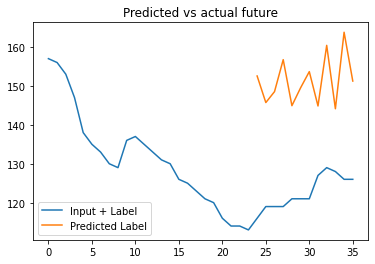

[Training:35] Total Loss: 1.36 Loss: 1.38: 100%|██████████| 93/93 [00:22<00:00,  4.05it/s]


tensor([0.4899, 0.5142, 0.4685, 0.4578, 0.4730, 0.4608, 0.4981, 0.4758, 0.4553,
        0.4375, 0.4715, 0.4646], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5450, 0.5350, 0.5500, 0.5650, 0.5600, 0.5450, 0.5300, 0.5125, 0.4975,
        0.4975, 0.5025, 0.4950], device='cuda:0')


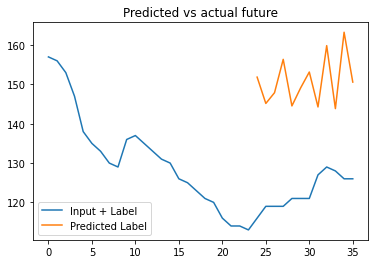

[Training:36] Total Loss: 1.35 Loss: 1.29: 100%|██████████| 93/93 [00:22<00:00,  4.20it/s]


tensor([0.4085, 0.3925, 0.3944, 0.3989, 0.3816, 0.3966, 0.3973, 0.3991, 0.4055,
        0.3753, 0.4294, 0.3977], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3350, 0.3400, 0.3400, 0.3400, 0.3450, 0.3550, 0.3725, 0.3800, 0.3875,
        0.3950, 0.4050, 0.4025], device='cuda:0')


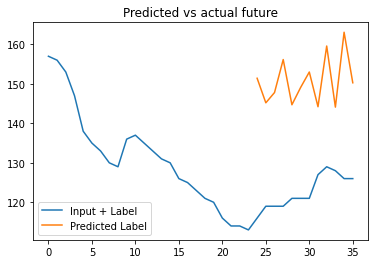

[Training:37] Total Loss: 1.34 Loss: 1.44: 100%|██████████| 93/93 [00:23<00:00,  4.03it/s]


tensor([0.4256, 0.4252, 0.4235, 0.4295, 0.4164, 0.4153, 0.4147, 0.4338, 0.4269,
        0.4018, 0.4217, 0.4216], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3700, 0.3725, 0.3500, 0.3500, 0.3600, 0.3525, 0.3450, 0.3400, 0.3225,
        0.3250, 0.3150, 0.3100], device='cuda:0')


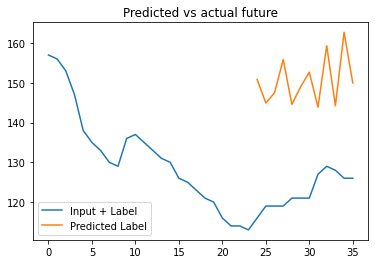

[Training:38] Total Loss: 1.33 Loss: 1.36: 100%|██████████| 93/93 [00:23<00:00,  4.01it/s]


tensor([0.3464, 0.3288, 0.3339, 0.3638, 0.3381, 0.3486, 0.3559, 0.3410, 0.3835,
        0.3437, 0.3745, 0.3534], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3475, 0.3475, 0.3475, 0.3450, 0.3450, 0.3450, 0.3400, 0.3350, 0.3375,
        0.2700, 0.2775, 0.2800], device='cuda:0')


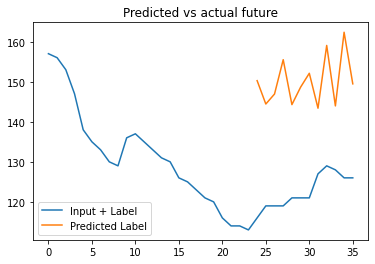

[Training:39] Total Loss: 1.33 Loss: 1.18: 100%|██████████| 93/93 [00:23<00:00,  4.02it/s]


tensor([0.3107, 0.2804, 0.2979, 0.3033, 0.2948, 0.3200, 0.3161, 0.3108, 0.3305,
        0.3293, 0.3221, 0.3073], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2600, 0.2625, 0.2650, 0.2675, 0.2700, 0.2800, 0.2875, 0.2900, 0.2950,
        0.2975, 0.3000, 0.3025], device='cuda:0')


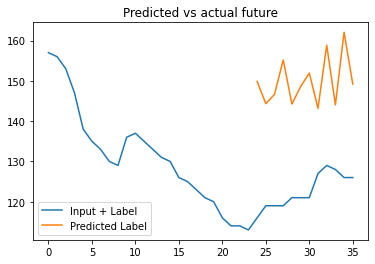

[Training:40] Total Loss: 1.32 Loss: 1.32: 100%|██████████| 93/93 [00:22<00:00,  4.12it/s]


tensor([0.4517, 0.4133, 0.4147, 0.4145, 0.4076, 0.4032, 0.4482, 0.4210, 0.3850,
        0.4183, 0.4406, 0.3968], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6275, 0.6225, 0.6175, 0.6325, 0.6475, 0.6575, 0.6650, 0.6900, 0.7050,
        0.7150, 0.7275, 0.7325], device='cuda:0')


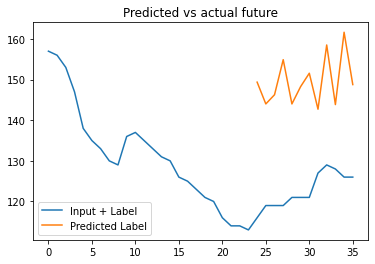

[Training:41] Total Loss: 1.31 Loss: 1.32: 100%|██████████| 93/93 [00:23<00:00,  4.01it/s]


tensor([0.4618, 0.4879, 0.4789, 0.4862, 0.4494, 0.4506, 0.4541, 0.4948, 0.4169,
        0.4530, 0.4490, 0.4515], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4575, 0.4275, 0.4300, 0.4300, 0.4200, 0.4000, 0.3750, 0.3525, 0.3325,
        0.3125, 0.2950, 0.2825], device='cuda:0')


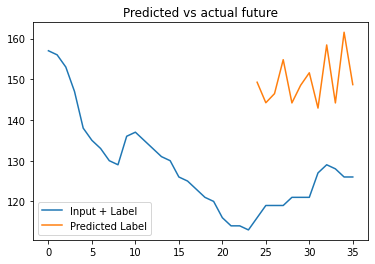

[Training:42] Total Loss: 1.31 Loss: 1.22: 100%|██████████| 93/93 [00:22<00:00,  4.12it/s]


tensor([0.3508, 0.3316, 0.3402, 0.3550, 0.3351, 0.3558, 0.3599, 0.3531, 0.3651,
        0.3541, 0.3657, 0.3488], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2675, 0.2775, 0.2850, 0.2925, 0.2975, 0.2975, 0.2975, 0.2975, 0.2975,
        0.2975, 0.3000, 0.3000], device='cuda:0')


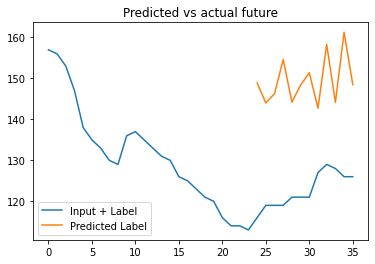

[Training:43] Total Loss: 1.30 Loss: 1.20: 100%|██████████| 93/93 [00:23<00:00,  3.92it/s]


tensor([0.4399, 0.4441, 0.4371, 0.4533, 0.4312, 0.4298, 0.4494, 0.4538, 0.4354,
        0.4388, 0.4248, 0.4207], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5725, 0.5725, 0.5475, 0.4700, 0.5250, 0.5225, 0.5275, 0.5350, 0.5400,
        0.5300, 0.5325, 0.5325], device='cuda:0')


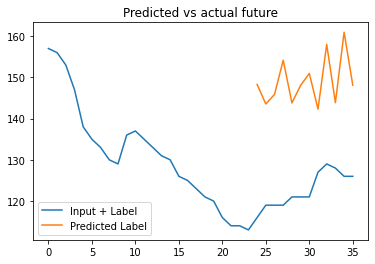

[Training:44] Total Loss: 1.29 Loss: 1.31: 100%|██████████| 93/93 [00:24<00:00,  3.83it/s]


tensor([0.3184, 0.3024, 0.3137, 0.3372, 0.3133, 0.3309, 0.3299, 0.3286, 0.3650,
        0.3257, 0.3423, 0.3286], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2300, 0.2300, 0.2300, 0.2250, 0.2250, 0.2250, 0.2225, 0.2200, 0.2200,
        0.2175, 0.2175, 0.2150], device='cuda:0')


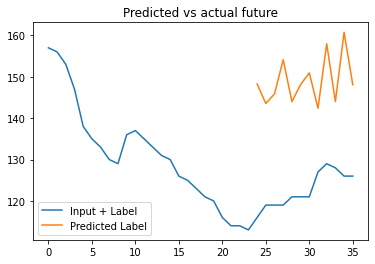

[Training:45] Total Loss: 1.29 Loss: 1.25: 100%|██████████| 93/93 [00:23<00:00,  4.00it/s]


tensor([0.4872, 0.5026, 0.4823, 0.4801, 0.4605, 0.4717, 0.4588, 0.4988, 0.4661,
        0.4432, 0.4668, 0.4767], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5150, 0.5075, 0.5000, 0.4975, 0.4925, 0.4900, 0.4875, 0.4825, 0.4750,
        0.4550, 0.4325, 0.4200], device='cuda:0')


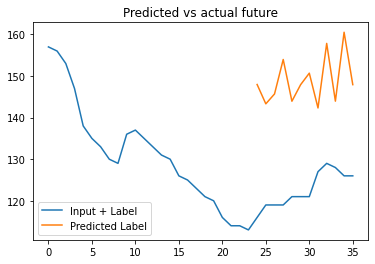

[Training:46] Total Loss: 1.28 Loss: 1.36: 100%|██████████| 93/93 [00:23<00:00,  3.91it/s]


tensor([0.3262, 0.3034, 0.2984, 0.3170, 0.3031, 0.3400, 0.3469, 0.3180, 0.3477,
        0.3137, 0.3555, 0.3354], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1600, 0.1600, 0.1625, 0.1775, 0.1825, 0.2175, 0.1875, 0.1675, 0.1750,
        0.1875, 0.1950, 0.1975], device='cuda:0')


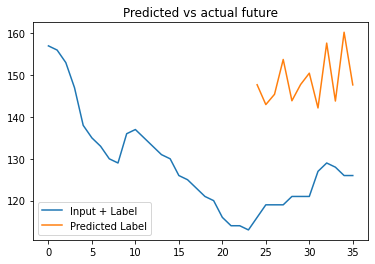

[Training:47] Total Loss: 1.28 Loss: 1.27: 100%|██████████| 93/93 [00:23<00:00,  3.94it/s]


tensor([0.3287, 0.3152, 0.3175, 0.3525, 0.3250, 0.3419, 0.3416, 0.3396, 0.3697,
        0.3509, 0.3515, 0.3300], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2900, 0.2775, 0.2450, 0.2275, 0.2125, 0.2000, 0.1900, 0.1800, 0.1675,
        0.1600, 0.1500, 0.1425], device='cuda:0')


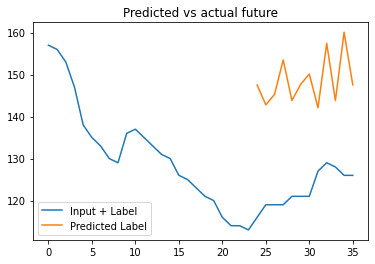

[Training:48] Total Loss: 1.27 Loss: 1.24: 100%|██████████| 93/93 [00:23<00:00,  3.88it/s]


tensor([0.3660, 0.3510, 0.3595, 0.3448, 0.3438, 0.3587, 0.3743, 0.3672, 0.3751,
        0.3692, 0.3576, 0.3566], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3400, 0.3550, 0.3825, 0.3900, 0.4200, 0.4550, 0.4900, 0.5125, 0.5250,
        0.5375, 0.5500, 0.5600], device='cuda:0')


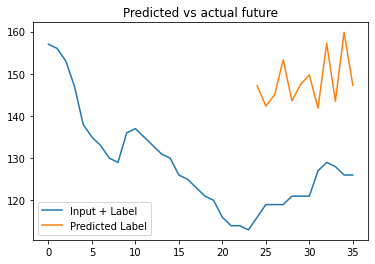

[Training:49] Total Loss: 1.27 Loss: 1.34: 100%|██████████| 93/93 [00:22<00:00,  4.18it/s]


tensor([0.5264, 0.5306, 0.5274, 0.5165, 0.5143, 0.4858, 0.5027, 0.5108, 0.4841,
        0.4931, 0.4793, 0.4890], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.7350, 0.7300, 0.7275, 0.7150, 0.6925, 0.6600, 0.6250, 0.5900, 0.5550,
        0.5200, 0.4925, 0.4525], device='cuda:0')


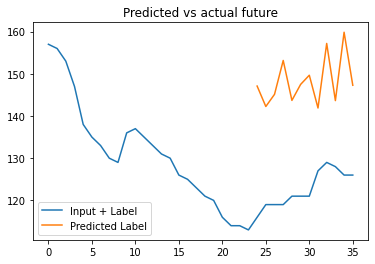

[Training:50] Total Loss: 1.27 Loss: 1.23: 100%|██████████| 93/93 [00:22<00:00,  4.18it/s]


tensor([0.4338, 0.4325, 0.4191, 0.4299, 0.4312, 0.4228, 0.4418, 0.4290, 0.4162,
        0.4149, 0.4331, 0.4255], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4925, 0.4900, 0.4925, 0.4825, 0.4600, 0.4500, 0.4475, 0.4550, 0.4675,
        0.4775, 0.4850, 0.4925], device='cuda:0')


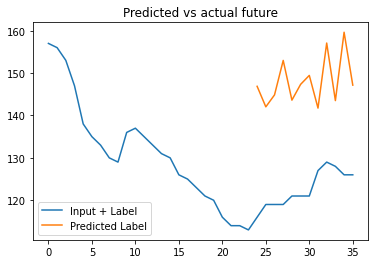

[Training:51] Total Loss: 1.26 Loss: 1.24: 100%|██████████| 93/93 [00:22<00:00,  4.11it/s]


tensor([0.2760, 0.2702, 0.3016, 0.3022, 0.2816, 0.3162, 0.3151, 0.3020, 0.3113,
        0.3386, 0.3124, 0.2881], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2300, 0.2375, 0.2375, 0.2375, 0.2400, 0.2400, 0.2350, 0.2350, 0.2525,
        0.2600, 0.2425, 0.2400], device='cuda:0')


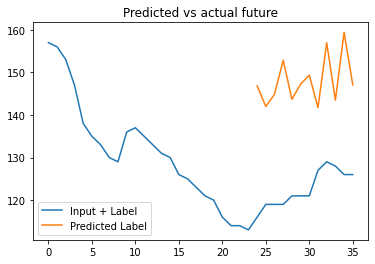

[Training:52] Total Loss: 1.26 Loss: 1.27: 100%|██████████| 93/93 [00:22<00:00,  4.12it/s]


tensor([0.3929, 0.3919, 0.3976, 0.4011, 0.3843, 0.3941, 0.3877, 0.3986, 0.4063,
        0.3792, 0.4115, 0.3982], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2950, 0.2875, 0.2825, 0.2850, 0.2825, 0.2675, 0.2500, 0.2225, 0.2125,
        0.2250, 0.2425, 0.2400], device='cuda:0')


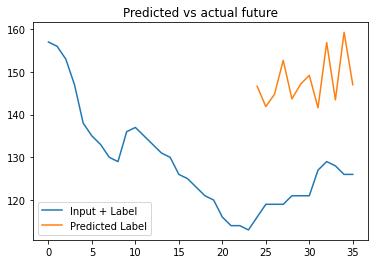

[Training:53] Total Loss: 1.26 Loss: 1.17: 100%|██████████| 93/93 [00:23<00:00,  4.04it/s]


tensor([0.3299, 0.3341, 0.3368, 0.3548, 0.3365, 0.3632, 0.3620, 0.3523, 0.3674,
        0.3578, 0.3520, 0.3422], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3375, 0.3325, 0.3275, 0.3275, 0.3425, 0.3700, 0.3625, 0.3600, 0.3525,
        0.3425, 0.3150, 0.2975], device='cuda:0')


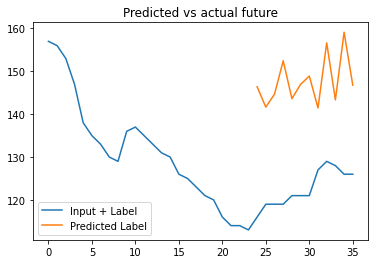

[Training:54] Total Loss: 1.25 Loss: 1.17: 100%|██████████| 93/93 [00:23<00:00,  4.01it/s]


tensor([0.4226, 0.4121, 0.4184, 0.4144, 0.3975, 0.4031, 0.4091, 0.4180, 0.4096,
        0.3944, 0.4384, 0.4174], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5050, 0.5200, 0.5375, 0.5575, 0.5850, 0.6100, 0.6325, 0.6375, 0.6375,
        0.6475, 0.6550, 0.6625], device='cuda:0')


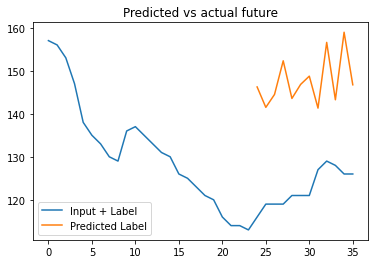

[Training:55] Total Loss: 1.25 Loss: 1.25: 100%|██████████| 93/93 [00:23<00:00,  3.99it/s]


tensor([0.3248, 0.3031, 0.3118, 0.3199, 0.3105, 0.3356, 0.3309, 0.3250, 0.3430,
        0.3305, 0.3490, 0.3336], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2500, 0.2500, 0.2550, 0.2600, 0.2650, 0.2750, 0.2775, 0.2825, 0.2875,
        0.2875, 0.2900, 0.2925], device='cuda:0')


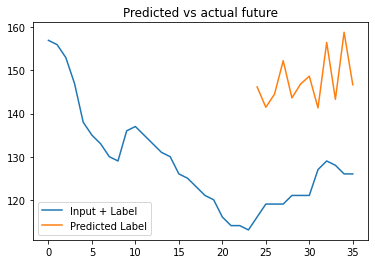

[Training:56] Total Loss: 1.25 Loss: 1.25: 100%|██████████| 93/93 [00:22<00:00,  4.15it/s]


tensor([0.4353, 0.4287, 0.4214, 0.4285, 0.4351, 0.4270, 0.4429, 0.4289, 0.4370,
        0.4210, 0.4265, 0.4223], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4550, 0.4525, 0.4625, 0.4725, 0.4475, 0.4250, 0.4150, 0.3950, 0.3700,
        0.3400, 0.3275, 0.3300], device='cuda:0')


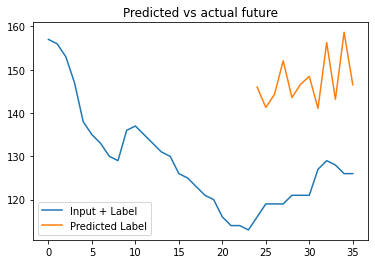

[Training:57] Total Loss: 1.24 Loss: 1.27: 100%|██████████| 93/93 [00:23<00:00,  4.04it/s]


tensor([0.3604, 0.3457, 0.3471, 0.3622, 0.3492, 0.3625, 0.3696, 0.3575, 0.3716,
        0.3596, 0.3783, 0.3624], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3225, 0.3250, 0.3350, 0.3375, 0.3375, 0.3350, 0.3350, 0.3350, 0.3325,
        0.3200, 0.3125, 0.3175], device='cuda:0')


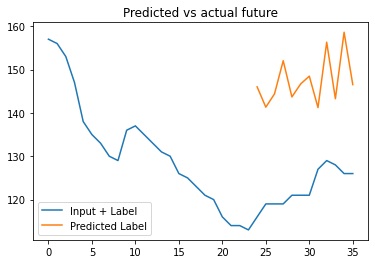

[Training:58] Total Loss: 1.24 Loss: 1.19: 100%|██████████| 93/93 [00:23<00:00,  3.93it/s]


tensor([0.4011, 0.3995, 0.4028, 0.4064, 0.3957, 0.4031, 0.4001, 0.3981, 0.4099,
        0.3816, 0.4252, 0.4042], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3375, 0.3300, 0.3225, 0.3150, 0.3050, 0.3025, 0.3100, 0.3125, 0.3100,
        0.3050, 0.2975, 0.2975], device='cuda:0')


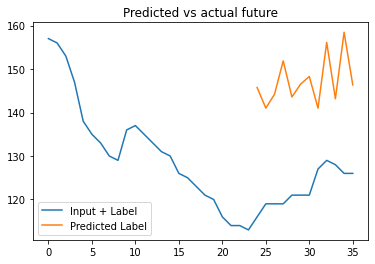

[Training:59] Total Loss: 1.24 Loss: 1.20: 100%|██████████| 93/93 [00:25<00:00,  3.65it/s]


tensor([0.4795, 0.4812, 0.4693, 0.4784, 0.4641, 0.4484, 0.4718, 0.4769, 0.4483,
        0.4577, 0.4482, 0.4454], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4900, 0.4875, 0.4900, 0.4850, 0.4725, 0.4650, 0.4600, 0.4525, 0.4400,
        0.4350, 0.4300, 0.4250], device='cuda:0')


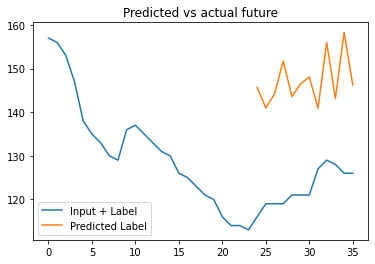

[Training:60] Total Loss: 1.24 Loss: 1.08: 100%|██████████| 93/93 [00:24<00:00,  3.74it/s]


tensor([0.5147, 0.5119, 0.4954, 0.4982, 0.5090, 0.4785, 0.4995, 0.4937, 0.4736,
        0.4799, 0.4804, 0.4814], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6575, 0.6625, 0.6625, 0.6625, 0.6600, 0.6600, 0.6625, 0.6575, 0.6575,
        0.6575, 0.6600, 0.6625], device='cuda:0')


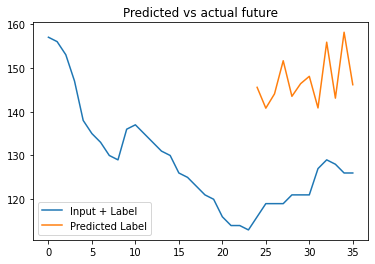

[Training:61] Total Loss: 1.24 Loss: 1.27: 100%|██████████| 93/93 [00:24<00:00,  3.72it/s]


tensor([0.4287, 0.4268, 0.4233, 0.4320, 0.4160, 0.4171, 0.4247, 0.4315, 0.4187,
        0.4320, 0.4120, 0.4066], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5150, 0.5175, 0.5175, 0.5200, 0.5200, 0.5225, 0.5225, 0.5250, 0.5250,
        0.5250, 0.5275, 0.5300], device='cuda:0')


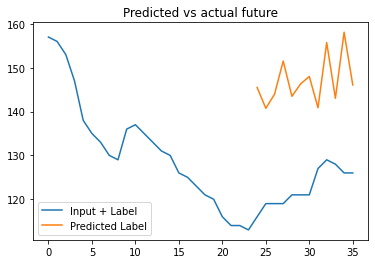

[Training:62] Total Loss: 1.23 Loss: 1.18: 100%|██████████| 93/93 [00:24<00:00,  3.80it/s]


tensor([0.4498, 0.4538, 0.4398, 0.4528, 0.4432, 0.4436, 0.4480, 0.4452, 0.4401,
        0.4391, 0.4323, 0.4324], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5300, 0.5250, 0.5225, 0.5200, 0.5150, 0.5100, 0.5050, 0.4975, 0.5000,
        0.5025, 0.5000, 0.4950], device='cuda:0')


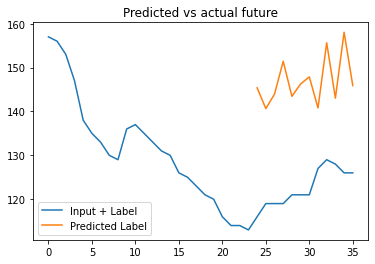

[Training:63] Total Loss: 1.23 Loss: 1.32: 100%|██████████| 93/93 [00:25<00:00,  3.70it/s]


tensor([0.3882, 0.3854, 0.3905, 0.4024, 0.3825, 0.3835, 0.3816, 0.3806, 0.3969,
        0.3723, 0.4012, 0.3764], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2775, 0.2700, 0.2700, 0.2675, 0.2625, 0.2575, 0.2525, 0.2550, 0.2525,
        0.2525, 0.2500, 0.2450], device='cuda:0')


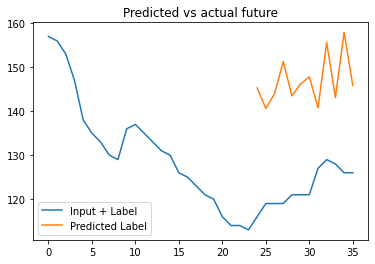

[Training:64] Total Loss: 1.23 Loss: 1.24: 100%|██████████| 93/93 [00:24<00:00,  3.84it/s]


tensor([0.2606, 0.2411, 0.2837, 0.2730, 0.2534, 0.2843, 0.2769, 0.2800, 0.3298,
        0.2916, 0.2999, 0.2709], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2225, 0.2050, 0.1850, 0.1875, 0.1950, 0.1875, 0.1725, 0.1500, 0.1325,
        0.1375, 0.1525, 0.1825], device='cuda:0')


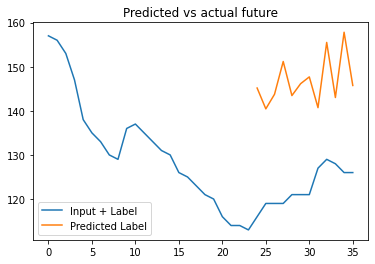

[Training:65] Total Loss: 1.23 Loss: 1.07: 100%|██████████| 93/93 [00:24<00:00,  3.77it/s]


tensor([0.3128, 0.3002, 0.3302, 0.3227, 0.3142, 0.3406, 0.3496, 0.3377, 0.3357,
        0.3286, 0.3454, 0.3339], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1850, 0.1750, 0.1700, 0.1650, 0.1500, 0.1375, 0.1250, 0.1125, 0.1025,
        0.1000, 0.1000, 0.1000], device='cuda:0')


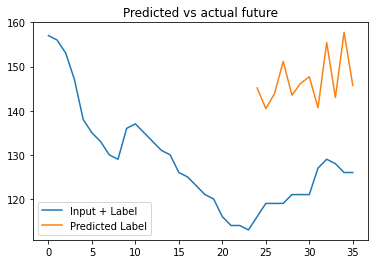

[Training:66] Total Loss: 1.23 Loss: 1.24: 100%|██████████| 93/93 [00:24<00:00,  3.83it/s]


tensor([0.5840, 0.5801, 0.5539, 0.5522, 0.5650, 0.5224, 0.5603, 0.5456, 0.5190,
        0.5261, 0.5266, 0.5315], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6700, 0.6700, 0.6575, 0.6500, 0.6450, 0.6225, 0.6025, 0.5850, 0.5625,
        0.5400, 0.5175, 0.5025], device='cuda:0')


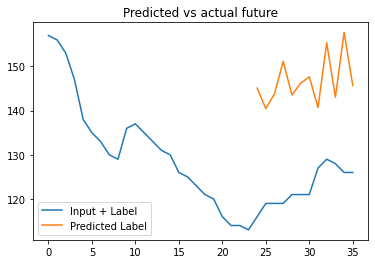

[Training:67] Total Loss: 1.22 Loss: 1.08: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.3977, 0.4057, 0.4060, 0.3951, 0.3964, 0.3892, 0.3957, 0.3962, 0.3894,
        0.3814, 0.4189, 0.3881], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4600, 0.4550, 0.4550, 0.4875, 0.4975, 0.4925, 0.4750, 0.4675, 0.4650,
        0.4625, 0.4450, 0.4325], device='cuda:0')


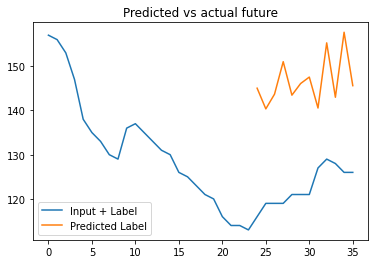

[Training:68] Total Loss: 1.22 Loss: 1.23: 100%|██████████| 93/93 [00:24<00:00,  3.78it/s]


tensor([0.4474, 0.4016, 0.4360, 0.3794, 0.3967, 0.3724, 0.3881, 0.4412, 0.3471,
        0.4129, 0.4405, 0.4136], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4800, 0.4775, 0.4725, 0.4725, 0.4675, 0.4600, 0.4525, 0.4425, 0.4350,
        0.4225, 0.4125, 0.3950], device='cuda:0')


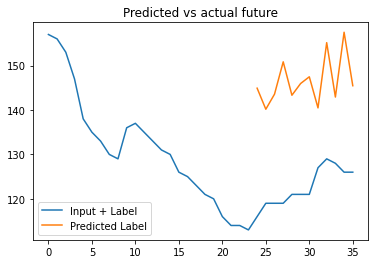

[Training:69] Total Loss: 1.22 Loss: 1.22: 100%|██████████| 93/93 [00:24<00:00,  3.84it/s]


tensor([0.2803, 0.2526, 0.2653, 0.2706, 0.2667, 0.2904, 0.2991, 0.2797, 0.3218,
        0.2930, 0.3159, 0.3001], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2100, 0.2300, 0.2375, 0.2450, 0.2625, 0.2825, 0.3025, 0.3150, 0.3225,
        0.3250, 0.3300, 0.3475], device='cuda:0')


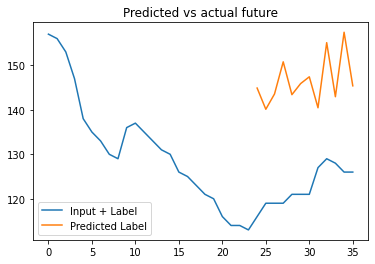

[Training:70] Total Loss: 1.22 Loss: 1.21: 100%|██████████| 93/93 [00:24<00:00,  3.85it/s]


tensor([0.4494, 0.4515, 0.4369, 0.4393, 0.4301, 0.4283, 0.4532, 0.4450, 0.4300,
        0.4275, 0.4357, 0.4303], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4250, 0.4150, 0.4125, 0.4100, 0.4050, 0.4000, 0.3975, 0.3925, 0.3850,
        0.3750, 0.3650, 0.3600], device='cuda:0')


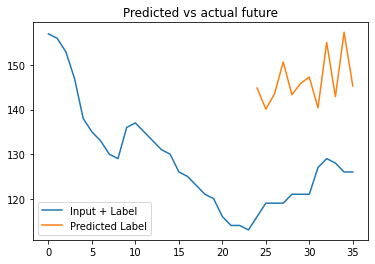

[Training:71] Total Loss: 1.22 Loss: 1.11: 100%|██████████| 93/93 [00:24<00:00,  3.84it/s]


tensor([0.5688, 0.5607, 0.5525, 0.5243, 0.5556, 0.5206, 0.5364, 0.5412, 0.4943,
        0.5159, 0.4970, 0.5265], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6750, 0.6650, 0.6575, 0.6550, 0.6500, 0.6500, 0.6450, 0.6400, 0.6500,
        0.6425, 0.6300, 0.6150], device='cuda:0')


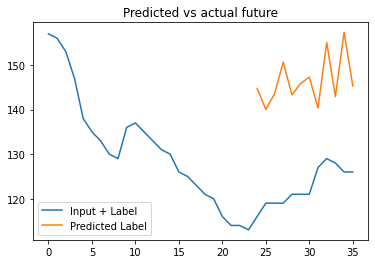

[Training:72] Total Loss: 1.22 Loss: 1.17: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.4364, 0.4288, 0.4316, 0.4409, 0.4318, 0.4174, 0.4233, 0.4479, 0.4202,
        0.4220, 0.4156, 0.4179], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6150, 0.6175, 0.6225, 0.6250, 0.6225, 0.6175, 0.6100, 0.6050, 0.5900,
        0.5700, 0.5700, 0.5775], device='cuda:0')


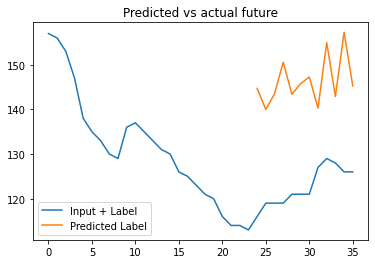

[Training:73] Total Loss: 1.22 Loss: 1.27: 100%|██████████| 93/93 [00:24<00:00,  3.74it/s]


tensor([0.2818, 0.2881, 0.3111, 0.3239, 0.3107, 0.3203, 0.3114, 0.3194, 0.3402,
        0.3141, 0.3219, 0.3260], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4175, 0.4025, 0.3825, 0.3600, 0.3350, 0.3150, 0.3000, 0.2800, 0.2675,
        0.2575, 0.2475, 0.2400], device='cuda:0')


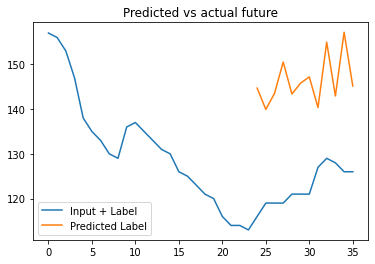

[Training:74] Total Loss: 1.22 Loss: 1.42: 100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


tensor([0.4147, 0.4161, 0.4119, 0.4177, 0.4144, 0.4103, 0.4093, 0.4290, 0.4215,
        0.3979, 0.4161, 0.4220], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4175, 0.4075, 0.4025, 0.4075, 0.4350, 0.4550, 0.4750, 0.4650, 0.4875,
        0.4825, 0.4325, 0.4050], device='cuda:0')


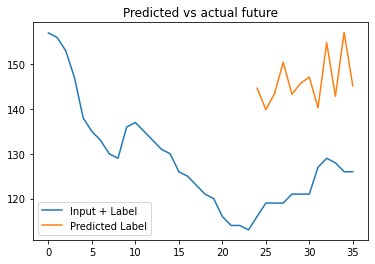

[Training:75] Total Loss: 1.22 Loss: 1.23: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]

tensor([0.3811, 0.3718, 0.3717, 0.3848, 0.3713, 0.3800, 0.3852, 0.3820, 0.3874,
        0.3822, 0.3891, 0.3790], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3550, 0.3575, 0.3575, 0.3550, 0.3575, 0.3600, 0.3650, 0.3675, 0.3675,
        0.3650, 0.3650, 0.3650], device='cuda:0')


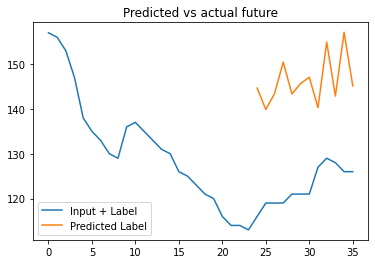

[Training:76] Total Loss: 1.21 Loss: 1.02: 100%|██████████| 93/93 [00:24<00:00,  3.78it/s]


tensor([0.3306, 0.3169, 0.3222, 0.3384, 0.3241, 0.3446, 0.3421, 0.3351, 0.3574,
        0.3451, 0.3582, 0.3412], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3025, 0.2900, 0.2775, 0.2675, 0.2575, 0.2425, 0.2200, 0.2000, 0.1950,
        0.1875, 0.1800, 0.1775], device='cuda:0')


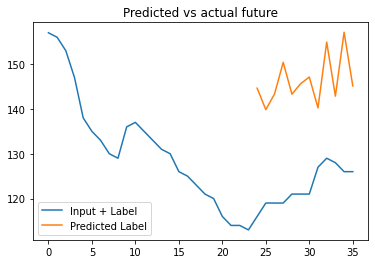

[Training:77] Total Loss: 1.21 Loss: 1.19: 100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


tensor([0.3393, 0.3196, 0.3274, 0.3338, 0.3277, 0.3460, 0.3444, 0.3364, 0.3491,
        0.3335, 0.3665, 0.3496], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3125, 0.3150, 0.3175, 0.3225, 0.3300, 0.3325, 0.3375, 0.3400, 0.3450,
        0.3500, 0.3600, 0.3675], device='cuda:0')


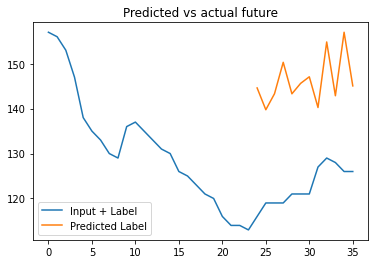

[Training:78] Total Loss: 1.21 Loss: 1.31: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.3458, 0.3361, 0.3434, 0.3577, 0.3361, 0.3527, 0.3573, 0.3528, 0.3627,
        0.3596, 0.3660, 0.3505], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2800, 0.2700, 0.2525, 0.2450, 0.2375, 0.2325, 0.2300, 0.2325, 0.2450,
        0.2775, 0.2775, 0.2725], device='cuda:0')


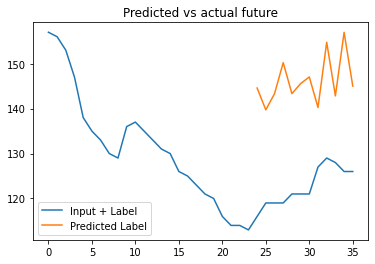

[Training:79] Total Loss: 1.21 Loss: 1.20: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.3137, 0.3130, 0.3286, 0.3206, 0.3035, 0.3283, 0.3284, 0.3252, 0.3378,
        0.3413, 0.3306, 0.3078], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4125, 0.4025, 0.3750, 0.3700, 0.3625, 0.3575, 0.3625, 0.3725, 0.3850,
        0.3950, 0.3975, 0.3925], device='cuda:0')


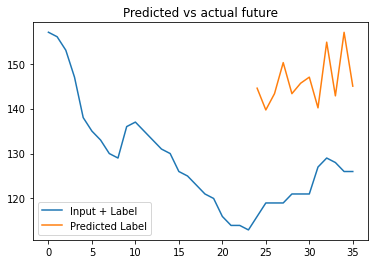

[Training:80] Total Loss: 1.21 Loss: 1.05: 100%|██████████| 93/93 [00:24<00:00,  3.74it/s]

tensor([0.3121, 0.2974, 0.3136, 0.3191, 0.3020, 0.3268, 0.3222, 0.3229, 0.3380,
        0.3335, 0.3389, 0.3258], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2650, 0.2725, 0.2800, 0.2900, 0.3000, 0.3075, 0.3175, 0.3250, 0.3325,
        0.3425, 0.3475, 0.3500], device='cuda:0')


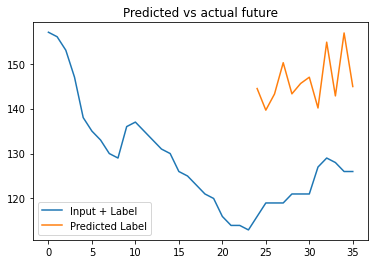

[Training:81] Total Loss: 1.21 Loss: 1.24: 100%|██████████| 93/93 [00:25<00:00,  3.69it/s]

tensor([0.4598, 0.4404, 0.4550, 0.4398, 0.4515, 0.4436, 0.4321, 0.4276, 0.4274,
        0.4411, 0.4437, 0.4036], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5950, 0.6125, 0.6250, 0.6375, 0.6550, 0.6650, 0.6700, 0.6800, 0.6825,
        0.6750, 0.6675, 0.6625], device='cuda:0')


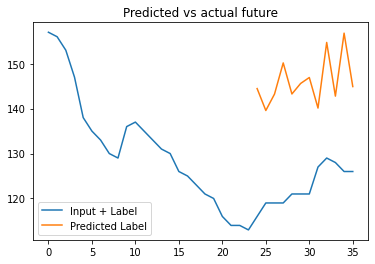

[Training:82] Total Loss: 1.21 Loss: 1.22: 100%|██████████| 93/93 [00:24<00:00,  3.83it/s]

tensor([0.3407, 0.3294, 0.3352, 0.3440, 0.3383, 0.3596, 0.3516, 0.3455, 0.3642,
        0.3541, 0.3639, 0.3514], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4700, 0.4725, 0.4625, 0.4450, 0.4275, 0.4000, 0.3875, 0.3900, 0.3800,
        0.3750, 0.3700, 0.3650], device='cuda:0')


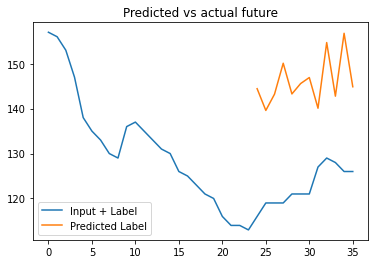

[Training:83] Total Loss: 1.21 Loss: 1.18: 100%|██████████| 93/93 [00:25<00:00,  3.72it/s]


tensor([0.4710, 0.4756, 0.4617, 0.4740, 0.4650, 0.4539, 0.4682, 0.4692, 0.4509,
        0.4644, 0.4469, 0.4475], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5850, 0.5850, 0.5575, 0.5200, 0.5125, 0.5275, 0.5375, 0.5475, 0.5575,
        0.5700, 0.5850, 0.6000], device='cuda:0')


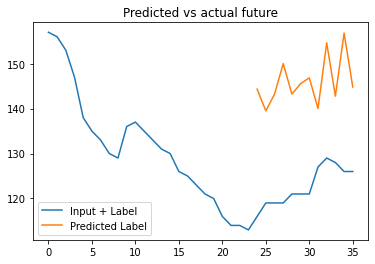

[Training:84] Total Loss: 1.21 Loss: 1.32: 100%|██████████| 93/93 [00:25<00:00,  3.72it/s]


tensor([0.3206, 0.3156, 0.3270, 0.3353, 0.3059, 0.3351, 0.3296, 0.3420, 0.3434,
        0.3428, 0.3454, 0.3309], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.1875, 0.2050, 0.2225, 0.2300, 0.2275, 0.2300, 0.2400, 0.2525, 0.2600,
        0.2700, 0.2825, 0.3050], device='cuda:0')


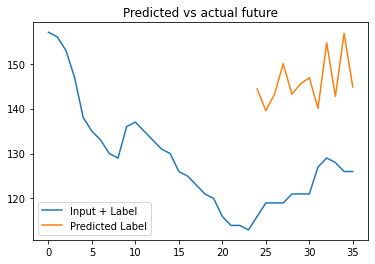

[Training:85] Total Loss: 1.21 Loss: 1.18: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.3722, 0.3636, 0.3617, 0.3752, 0.3579, 0.3661, 0.3788, 0.3768, 0.3772,
        0.3677, 0.3833, 0.3711], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2050, 0.1925, 0.1875, 0.1850, 0.1850, 0.1875, 0.2000, 0.2250, 0.2400,
        0.2375, 0.2650, 0.2975], device='cuda:0')


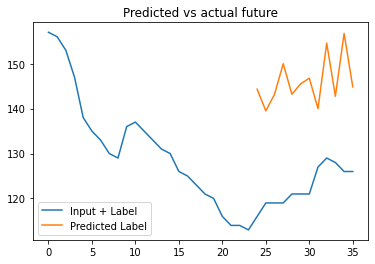

[Training:86] Total Loss: 1.21 Loss: 1.20: 100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


tensor([0.6023, 0.6118, 0.5947, 0.5700, 0.5847, 0.5151, 0.5819, 0.5712, 0.5282,
        0.5592, 0.5074, 0.5270], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6275, 0.6050, 0.6000, 0.5850, 0.5575, 0.5300, 0.5075, 0.4900, 0.4725,
        0.4675, 0.4700, 0.4775], device='cuda:0')


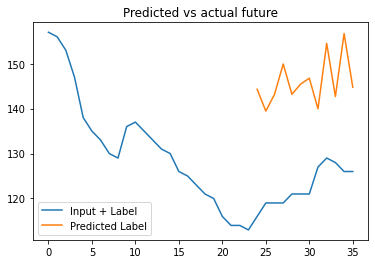

[Training:87] Total Loss: 1.21 Loss: 1.21: 100%|██████████| 93/93 [00:25<00:00,  3.72it/s]


tensor([0.4762, 0.4878, 0.4782, 0.4849, 0.4722, 0.4610, 0.4757, 0.4807, 0.4540,
        0.4681, 0.4512, 0.4491], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6500, 0.6525, 0.6450, 0.6350, 0.6225, 0.6075, 0.5875, 0.5775, 0.5725,
        0.5600, 0.5425, 0.5325], device='cuda:0')


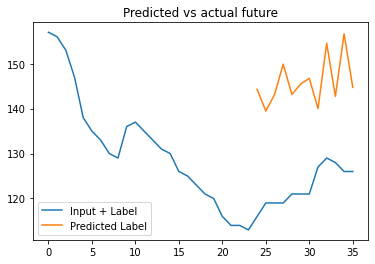

[Training:88] Total Loss: 1.21 Loss: 1.17: 100%|██████████| 93/93 [00:24<00:00,  3.78it/s]


tensor([0.4669, 0.4794, 0.4712, 0.4599, 0.4505, 0.4248, 0.4563, 0.4773, 0.4376,
        0.4618, 0.4250, 0.4350], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5750, 0.5425, 0.4925, 0.4450, 0.4100, 0.3850, 0.3675, 0.3525, 0.3425,
        0.3375, 0.3325, 0.3250], device='cuda:0')


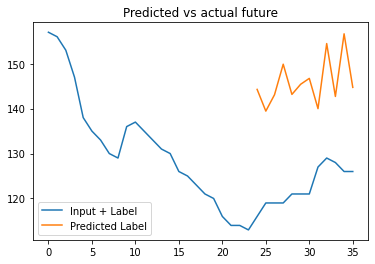

[Training:89] Total Loss: 1.21 Loss: 1.23: 100%|██████████| 93/93 [00:25<00:00,  3.70it/s]


tensor([0.4867, 0.4980, 0.4801, 0.4807, 0.4801, 0.4663, 0.4649, 0.5005, 0.4593,
        0.4575, 0.4525, 0.4739], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4575, 0.4425, 0.4250, 0.4125, 0.4075, 0.4000, 0.3900, 0.3800, 0.3700,
        0.3625, 0.3500, 0.3375], device='cuda:0')


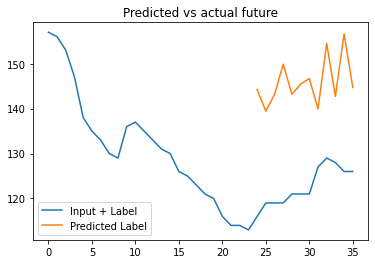

[Training:90] Total Loss: 1.21 Loss: 1.22: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.4860, 0.4907, 0.4774, 0.4876, 0.4769, 0.4594, 0.4811, 0.4831, 0.4599,
        0.4675, 0.4568, 0.4553], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5900, 0.5900, 0.5925, 0.5925, 0.6075, 0.6150, 0.6150, 0.6150, 0.6150,
        0.6125, 0.6075, 0.6050], device='cuda:0')


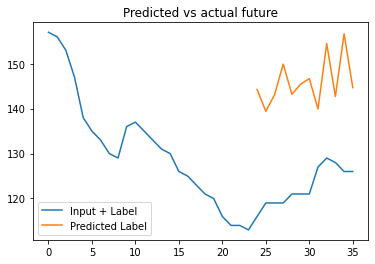

[Training:91] Total Loss: 1.21 Loss: 1.11: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.5160, 0.5326, 0.5203, 0.5019, 0.5106, 0.4996, 0.4927, 0.5151, 0.4769,
        0.4867, 0.4914, 0.5001], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5800, 0.5850, 0.5825, 0.6200, 0.6025, 0.5925, 0.6025, 0.5900, 0.5675,
        0.5450, 0.5325, 0.5425], device='cuda:0')


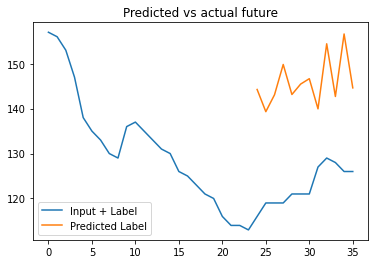

[Training:92] Total Loss: 1.21 Loss: 1.29: 100%|██████████| 93/93 [00:25<00:00,  3.71it/s]


tensor([0.3473, 0.3437, 0.3513, 0.3569, 0.3509, 0.3545, 0.3536, 0.3699, 0.3792,
        0.3461, 0.3687, 0.3684], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2725, 0.2725, 0.2775, 0.2850, 0.2925, 0.3050, 0.3200, 0.3450, 0.3575,
        0.3650, 0.3700, 0.3725], device='cuda:0')


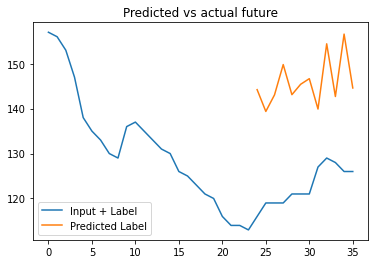

[Training:93] Total Loss: 1.20 Loss: 1.11: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.2725, 0.2667, 0.2900, 0.2711, 0.2715, 0.3025, 0.3045, 0.3011, 0.3011,
        0.3133, 0.2990, 0.2737], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4250, 0.4600, 0.4725, 0.4800, 0.4850, 0.4950, 0.5025, 0.5125, 0.5175,
        0.5200, 0.5250, 0.5275], device='cuda:0')


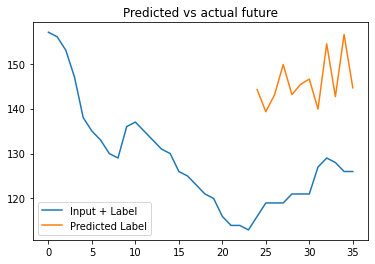

[Training:94] Total Loss: 1.21 Loss: 1.29: 100%|██████████| 93/93 [00:24<00:00,  3.80it/s]


tensor([0.4641, 0.4773, 0.4533, 0.4612, 0.4656, 0.4471, 0.4774, 0.4685, 0.4589,
        0.4505, 0.4467, 0.4501], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3875, 0.4125, 0.4275, 0.4325, 0.4425, 0.4400, 0.4300, 0.4200, 0.4100,
        0.4025, 0.3975, 0.3900], device='cuda:0')


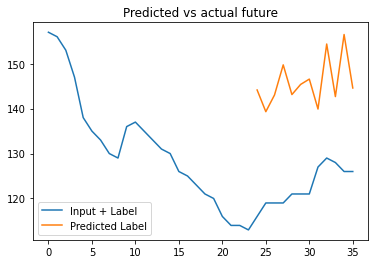

[Training:95] Total Loss: 1.20 Loss: 1.17: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.3672, 0.3629, 0.3623, 0.3780, 0.3557, 0.3765, 0.3774, 0.3792, 0.3806,
        0.3716, 0.3804, 0.3720], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3725, 0.3650, 0.3475, 0.3350, 0.3325, 0.3225, 0.3150, 0.2950, 0.2825,
        0.2900, 0.2925, 0.2925], device='cuda:0')


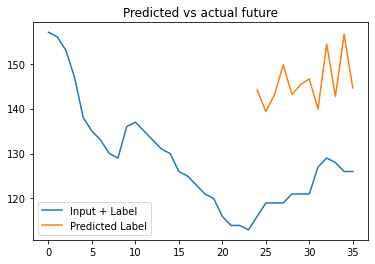

[Training:96] Total Loss: 1.20 Loss: 1.20: 100%|██████████| 93/93 [00:24<00:00,  3.79it/s]


tensor([0.2912, 0.2734, 0.2938, 0.3029, 0.2867, 0.3106, 0.3004, 0.3176, 0.3455,
        0.2999, 0.3214, 0.3243], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.2675, 0.2725, 0.2725, 0.2775, 0.2825, 0.2875, 0.3075, 0.3125, 0.3250,
        0.3575, 0.3900, 0.3925], device='cuda:0')


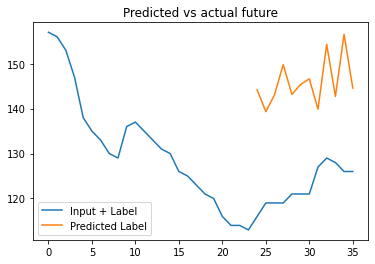

[Training:97] Total Loss: 1.20 Loss: 1.11: 100%|██████████| 93/93 [00:24<00:00,  3.73it/s]


tensor([0.4166, 0.4087, 0.4053, 0.4139, 0.4090, 0.4067, 0.4129, 0.4100, 0.4085,
        0.4050, 0.4169, 0.4100], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.4250, 0.4250, 0.4200, 0.4150, 0.4100, 0.4075, 0.4075, 0.4050, 0.4025,
        0.3950, 0.3850, 0.3775], device='cuda:0')


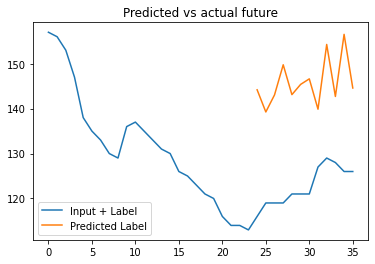

[Training:98] Total Loss: 1.20 Loss: 1.23: 100%|██████████| 93/93 [00:24<00:00,  3.76it/s]


tensor([0.4544, 0.4555, 0.4439, 0.4551, 0.4477, 0.4392, 0.4489, 0.4472, 0.4392,
        0.4421, 0.4369, 0.4363], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.5000, 0.4950, 0.4875, 0.4825, 0.4750, 0.4750, 0.4825, 0.4825, 0.4825,
        0.4825, 0.4825, 0.4800], device='cuda:0')


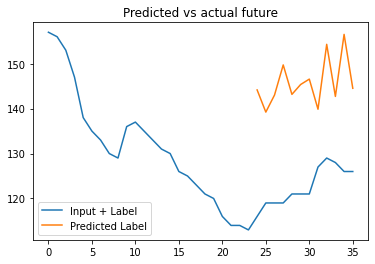

[Training:99] Total Loss: 1.20 Loss: 1.15: 100%|██████████| 93/93 [00:24<00:00,  3.75it/s]


tensor([0.5005, 0.5503, 0.5250, 0.5616, 0.5195, 0.4959, 0.5348, 0.5331, 0.5138,
        0.5133, 0.5279, 0.4875], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.7300, 0.7375, 0.7425, 0.7625, 0.7775, 0.7825, 0.7750, 0.7625, 0.7350,
        0.7100, 0.6925, 0.6750], device='cuda:0')


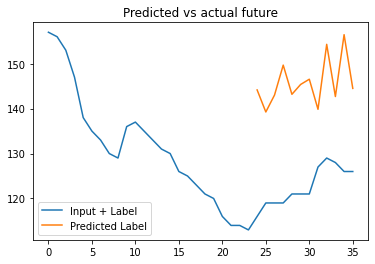

[Training:100] Total Loss: 1.20 Loss: 1.29: 100%|██████████| 93/93 [00:24<00:00,  3.78it/s]


tensor([0.5491, 0.5494, 0.5311, 0.5135, 0.5231, 0.4876, 0.5171, 0.5444, 0.4642,
        0.5368, 0.4658, 0.4559], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.6850, 0.6900, 0.6950, 0.7025, 0.7125, 0.7200, 0.7225, 0.7275, 0.7250,
        0.7350, 0.7525, 0.7625], device='cuda:0')


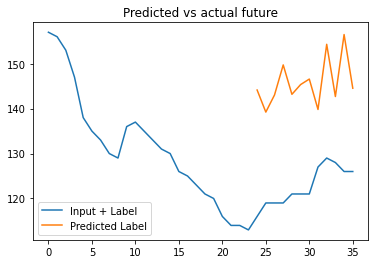

[Training:101] Total Loss: 1.20 Loss: 1.34: 100%|██████████| 93/93 [00:23<00:00,  3.89it/s]


tensor([0.3179, 0.3157, 0.3248, 0.3490, 0.3165, 0.3384, 0.3450, 0.3368, 0.3477,
        0.3466, 0.3443, 0.3329], device='cuda:0', grad_fn=<SelectBackward0>) tensor([0.3025, 0.3375, 0.3550, 0.3775, 0.3975, 0.4150, 0.4300, 0.4450, 0.4600,
        0.4750, 0.4900, 0.5000], device='cuda:0')


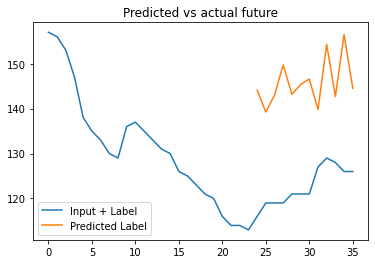

[Validation:101] Total Loss: 0.03 Loss: 0.70:   4%|▍         | 1/23 [00:00<00:04,  4.94it/s]


KeyboardInterrupt: 

In [7]:
torch.autograd.set_detect_anomaly(False)
loss_function = nn.MSELoss()
best_val_loss = torch.inf
stopping_counter = 0
for epoch in range(epochs):
    total_loss = 0
    with torch.no_grad():
        x, y, inp = val_data.get_first_example()
        x = torch.tensor(x).unsqueeze(0)
        x = prepare_data(x).to(device)
        model.eval()
        y_pred = model(x)[0].cpu().numpy()
        model.train()
        fig = plot_example(y, y_pred, inp, scale_factor=train_data.scale_max["cbg"])
        plt.show()
        with tqdm(val_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                loss = model.calculate_loss(y)
                total_loss += loss.item()
                t.set_description(f"[Validation:{epoch - 1}] Total Loss: {total_loss / len(val_loader):.2f} Loss: {loss.item():.2f}")
    if total_loss < best_val_loss:
        best_val_loss = total_loss
        torch.save(model.state_dict(), f"checkpoints/nbeats_custom_best_{output_dim}.chkpt")
        stopping_counter = 0
    else: 
        stopping_counter += 1
        if stopping_counter >= early_stopping_counter:
            break
    total_loss = 0
    with tqdm(train_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)

            y = y.to(device)
            y_pred = model(x)
            loss = model.calculate_loss(y)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            t.set_description(f"[Training:{epoch}] Total Loss: {total_loss / len(train_loader):.2f} Loss: {loss.item():.2f}")
        print(y_pred[0], y[0])
    scheduler.step()
    scheduler2.step()
            

# Evaluate on test set
* Calculate the rMSE and MAE values for 30min/60min prediction horizon

In [8]:
test_data = OhioData(mode="test", h=output_dim)
test_loader = DataLoader(test_data, batch_size=1, num_workers=0)

mse_loss = nn.MSELoss()
model = NBeats(n_blocks=n_blocks, input_dim=input_dim, parameter_dim=n_features, output_dim=output_dim, amount_fc=amount_fc, hidden_dim=hidden_dim, lstm_hidden=lstm_hidden, lstm_layer=lstm_layer, lstm_bidirectional=bidirectional).to(device)

# model = NBeats(n_blocks=n_blocks, input_dim=input_dim, parameter_dim=n_features, output_dim=output_dim, amount_fc=amount_fc, hidden_dim=hidden_dim).to(device)
model.load_state_dict(torch.load(f"checkpoints/nbeats_custom_best_{output_dim}.chkpt"))
model = model.eval().to(device)

In [9]:
total_loss = 0

with torch.no_grad():
    with tqdm(test_loader) as t:
        for x, y, mask in t:
            x = prepare_data(x).to(device)
            y = y.to(device)
            y_pred = model(x)
            # scale back to original range, because otherwise the results cannot bne compared to others
            y = y * train_data.scale_max["cbg"]
            y_pred = y_pred * train_data.scale_max["cbg"]
            loss = mse_loss(y_pred, y)
            total_loss += loss.item()
            t.set_description(f"Test Loss: {np.sqrt(total_loss / len(test_loader)):.2f}, Running Loss: {np.sqrt(loss.item()):.2f}")

print(f"Final rMSE: {np.sqrt(total_loss / len(test_loader))}")


Test Loss: 45.60, Running Loss: 62.47: 100%|██████████| 27784/27784 [05:43<00:00, 80.83it/s]  

Final rMSE: 45.60022803286954


# Evaluate results per patient

In [10]:
patient_ids = [559, 563, 570, 575, 588, 591, 540, 544, 552, 567, 584, 596]

mse_loss = nn.MSELoss()
mae_loss = nn.L1Loss()

In [12]:
maes = []
mses = []
with torch.no_grad():
    for id in patient_ids:
        total_mae = 0
        total_mse = 0
        test_data = OhioData(mode="test", patient_id=id, h=output_dim)
        test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                mse = mse_loss(y_pred, y)
                mae = mae_loss(y_pred, y)
                total_mae += mae.item()
                total_mse += mse.item()
                t.set_description(f"Patient: {id}, rMSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        print(f"Results - Patient: {id}, rMSE: {np.sqrt(total_mse / len(test_loader)):.2f}, MAE: {total_mae / len(test_loader):.2f}")
        maes.append(total_mae / len(test_loader))
        mses.append(total_mse / len(test_loader))
print(f"Mean results - MAE: {sum(maes) / len(maes)}, rMSE: {np.sqrt(sum(mses) / len(mses))}")

    

Patient: 559, rMSE: 54.67, MAE: 41.03: 100%|██████████| 2070/2070 [00:19<00:00, 105.21it/s]


Results - Patient: 559, rMSE: 54.67, MAE: 41.03


Patient: 563, rMSE: 38.03, MAE: 29.83: 100%|██████████| 2422/2422 [00:22<00:00, 106.66it/s]


Results - Patient: 563, rMSE: 38.03, MAE: 29.83


Patient: 570, rMSE: 54.13, MAE: 45.11: 100%|██████████| 2375/2375 [00:23<00:00, 101.50it/s]


Results - Patient: 570, rMSE: 54.13, MAE: 45.11


Patient: 575, rMSE: 44.85, MAE: 36.32: 100%|██████████| 2183/2183 [00:20<00:00, 107.58it/s]


Results - Patient: 575, rMSE: 44.85, MAE: 36.32


Patient: 588, rMSE: 40.60, MAE: 30.91: 100%|██████████| 2680/2680 [00:25<00:00, 106.53it/s]


Results - Patient: 588, rMSE: 40.60, MAE: 30.91


Patient: 591, rMSE: 40.16, MAE: 32.94: 100%|██████████| 2575/2575 [00:24<00:00, 106.76it/s]


Results - Patient: 591, rMSE: 40.16, MAE: 32.94


Patient: 540, rMSE: 51.76, MAE: 39.70: 100%|██████████| 2563/2563 [00:24<00:00, 105.12it/s]


Results - Patient: 540, rMSE: 51.76, MAE: 39.70


Patient: 544, rMSE: 43.83, MAE: 36.83: 100%|██████████| 2457/2457 [00:23<00:00, 102.55it/s]


Results - Patient: 544, rMSE: 43.83, MAE: 36.83


Patient: 552, rMSE: 40.61, MAE: 33.35: 100%|██████████| 1957/1957 [00:19<00:00, 102.60it/s]


Results - Patient: 552, rMSE: 40.61, MAE: 33.35


Patient: 567, rMSE: 46.82, MAE: 38.01: 100%|██████████| 1945/1945 [00:18<00:00, 102.96it/s]


Results - Patient: 567, rMSE: 46.82, MAE: 38.01


Patient: 584, rMSE: 48.77, MAE: 39.64: 100%|██████████| 2073/2073 [00:20<00:00, 102.74it/s]


Results - Patient: 584, rMSE: 48.77, MAE: 39.64


Patient: 596, rMSE: 40.97, MAE: 32.42: 100%|██████████| 2484/2484 [00:24<00:00, 102.68it/s]

Results - Patient: 596, rMSE: 40.97, MAE: 32.42
Mean results - MAE: 36.34179695421197, rMSE: 45.76675206255061


# Vizualize the predictions

## NOTE(!!!)

* all time steps where missing_cbg == True, the data is removed

In [ ]:
def plot_point(y, y_pred, model_name):
    fig, ax = plt.subplots(1)
    line = ax.plot(y, label="Groud Truth")
    line = ax.plot(y_pred, label="Prediction")
    _ = ax.set_title(f"Prediction vs Ground truth with model {model_name}")
    _ = ax.set_ylabel("mg/dL")
    _ = ax.set_xlabel("5min timesteps")

    legend = ax.legend()
    return fig

100%|██████████| 2142/2142 [00:19<00:00, 111.31it/s]


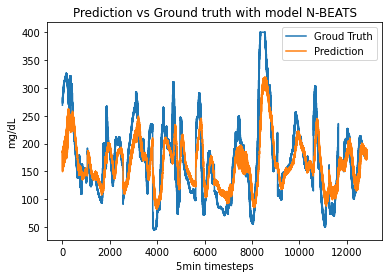

100%|██████████| 2446/2446 [00:21<00:00, 113.58it/s]


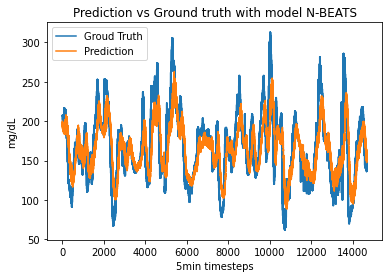

100%|██████████| 2435/2435 [00:21<00:00, 111.64it/s]


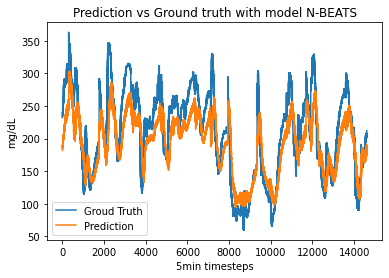

100%|██████████| 2249/2249 [00:19<00:00, 114.60it/s]


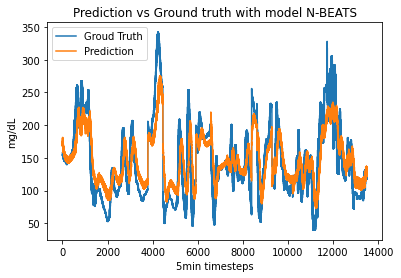

100%|██████████| 2698/2698 [00:25<00:00, 105.73it/s]


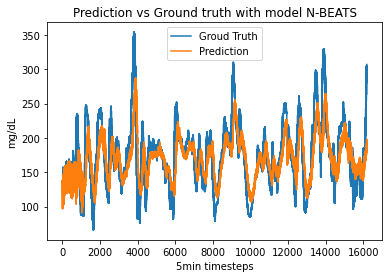

100%|██████████| 2605/2605 [00:24<00:00, 108.42it/s]


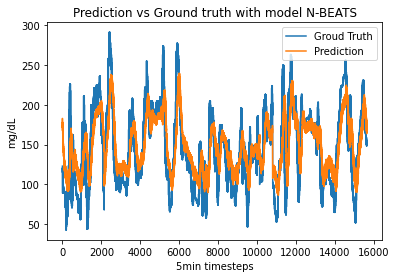

100%|██████████| 2617/2617 [00:23<00:00, 113.04it/s]


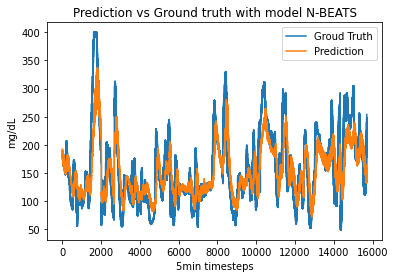

100%|██████████| 2499/2499 [00:22<00:00, 111.37it/s]


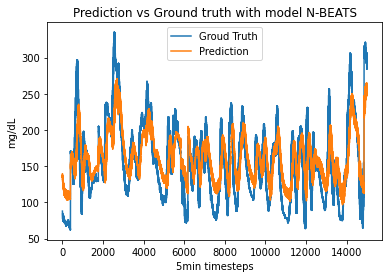

100%|██████████| 2023/2023 [00:18<00:00, 112.03it/s]


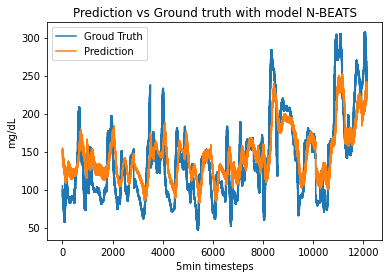

100%|██████████| 2017/2017 [00:17<00:00, 112.91it/s]


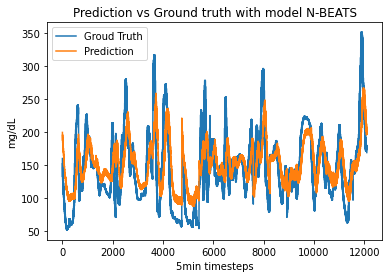

100%|██████████| 2169/2169 [00:19<00:00, 112.37it/s]


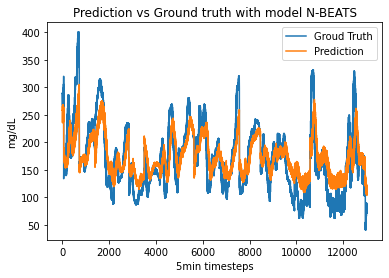

100%|██████████| 2526/2526 [00:22<00:00, 113.82it/s]


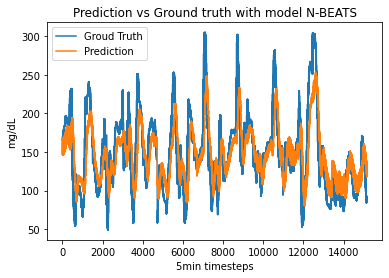

In [ ]:
# plot_point([1,2,3,4], [2,3,4,5], "N-BEATS")

for id in patient_ids:
    test_data = OhioData(mode="test", patient_id=id)
    test_loader = DataLoader(test_data, batch_size=1, num_workers=0)
    y_values = []
    y_pred_values = []
    with torch.no_grad():
        with tqdm(test_loader) as t:
            for x, y, mask in t:
                x = prepare_data(x).to(device)
                y = y.to(device)
                y_pred = model(x)
                y = y * train_data.scale_max["cbg"]
                y_pred = y_pred * train_data.scale_max["cbg"]
                y_values.extend(y[0].tolist())
                y_pred_values.extend(y_pred[0].tolist())
                
    fig = plot_point(y_values, y_pred_values, "N-BEATS")
    plt.show(fig)